Attempting to retrieve: MYR/USD (MYR=X)


/var/folders/3r/ssmx5m3d12g_x6rh5f93kd440000gn/T/ipykernel_82673/153785250.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/3r/ssmx5m3d12g_x6rh5f93kd440000gn/T/ipykernel_82673/153785250.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

✅ Retrieved: MYR/USD
Attempting to retrieve: SGD/USD (SGD=X)



/var/folders/3r/ssmx5m3d12g_x6rh5f93kd440000gn/T/ipykernel_82673/153785250.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/3r/ssmx5m3d12g_x6rh5f93kd440000gn/T/ipykernel_82673/153785250.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

✅ Retrieved: SGD/USD
Attempting to retrieve: RUB/USD (RUB=X)
✅ Retrieved: RUB/USD
Attempting to retrieve: TRY/USD (TRY=X)
✅ Retrieved: TRY/USD
✅ CSV saved to /data/fx_data_2015_2025.csv

--- Available Columns in DataFrame ---
Index(['MYR/USD', 'SGD/USD', 'RUB/USD', 'TRY/USD'], dtype='object')
-------------------------------------

✅ Found data for: ['MYR/USD', 'SGD/USD']. Generating plot...


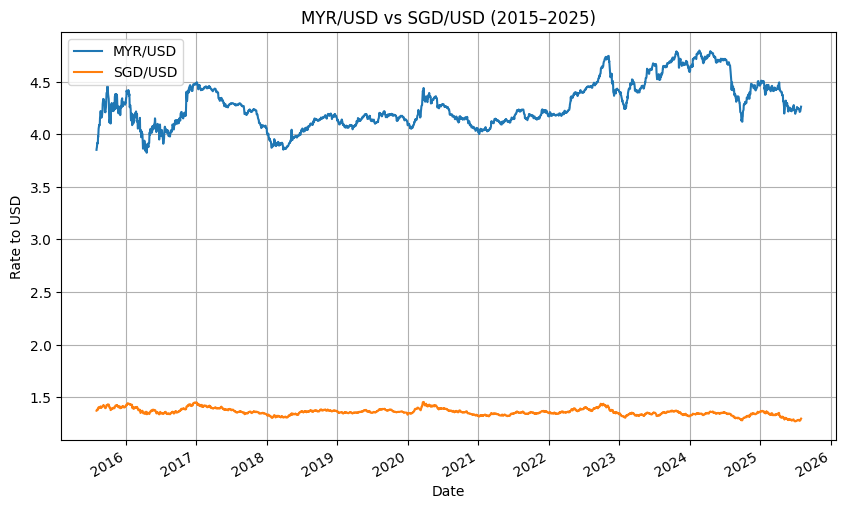

✅ Plot saved to /figures/myr_sgd_usd_10yr_plot.png


In [ ]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure output folders exist
os.makedirs('../data', exist_ok=True)
os.makedirs('../figures', exist_ok=True)

# Define currency pairs and time range
fx_pairs = {
    'MYR/USD': 'MYR=X',
    'SGD/USD': 'SGD=X',
    'RUB/USD': 'RUB=X',
    'TRY/USD': 'TRY=X'
}

start_date = '2015-08-01'
end_date = '2025-08-01'

# Create an empty DataFrame to hold all the 'Close' prices
# The index will be the date, which we'll populate with the first download
fx_df = pd.DataFrame()

# Fetch and combine data
for label, ticker in fx_pairs.items(): 
    print(f"Attempting to retrieve: {label} ({ticker})")
    data = yf.download(ticker, start=start_date, end=end_date)
    
    if not data.empty and 'Close' in data.columns:
        # Assign the 'Close' series directly to a new column named with the 'label'
        # This is the most reliable method.
        fx_df[label] = data['Close']
        print(f"Retrieved: {label}")
    else:
        print(f"Skipped: {label} — no data found.")

# --- The rest of your code can now run as expected ---

# Check if the DataFrame has any data before proceeding
if not fx_df.empty:
    # The DataFrame is already built, so we just save it
    fx_df.to_csv('../data/fx_data_2015_2025.csv')
    print("CSV saved to /data/fx_data_2015_2025.csv")

    # --- DIAGNOSTIC STEP ---
    print("\n--- Available Columns in DataFrame ---")
    print(fx_df.columns)
    print("-------------------------------------\n")
    
    # Plot MYR/USD and SGD/USD if available
    available = [pair for pair in ['MYR/USD', 'SGD/USD'] if pair in fx_df.columns]
    
    if available:
        print(f"Found data for: {available}. Generating plot...")
        # Use .dropna() to handle any missing values gracefully before plotting
        fx_df[available].dropna().plot(figsize=(10, 6), title='MYR/USD vs SGD/USD (2015–2025)')
        plt.ylabel('Rate to USD')
        plt.grid()
        plt.savefig('../figures/myr_sgd_usd_10yr_plot.png')
        plt.show()
        print("Plot saved to /figures/myr_sgd_usd_10yr_plot.png")
    else:
        print("Plotting skipped: Did not find data for both 'MYR/USD' and 'SGD/USD'.")
else:
    print("No valid data was downloaded. DataFrame is empty.")